# <span style="color:orange"> Assignment 02, Task 2, Weather.<span>
*By Laura Lyons*
***

#### <span style="color:orange">Import Data<span>

A number of imports were used to help with the data analysis and visualisation.

In [1]:
# Data frames
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

***
#### <span style="color:orange">Load the Data<span>
The dataset *'weatherreadings1.csv'* was downloaded from PFDA-courseware, which was pulled from [Github](https://github.com/andrewbeattycourseware/PFDA-courseware.git). I copied the file into the my directory, so any alterations made would remain on the copy of the dataset.

In [26]:
# Load the weather data set.
df = pd.read_csv('C:/Users/Laura/OneDrive/ATU_DA/24-25/programming-for-data-analytics/PFDA-assignments/assignment02/weatherreadings1.csv')

In [ ]:
# Lets inspect the variable types.
df.dtypes

From the above table we can see that there are 30 variables within the data set, however we are only interested in the variable of '*dryBulbTemperature_Celsius *' over time. We will use the variable *'reportStartDateTime '* as out time reference. This data will need to be manipulated as it contains both the data and time, while we only require the time.

Information on how to complete this data transformation was retrieved using Microsoft CoPilot.

In [28]:
# Convert the 'datetime' column to datetime format
df['datetime'] = pd.to_datetime(df['reportStartDateTime'])

# Extract just the time
df['time'] = df['datetime'].dt.time

# Rename the column
df.rename(columns={'dryBulbTemperature_Celsius': 'temperature'}, inplace=True)

# Save the updated CSV file
df.to_csv('weatherreadings_updated.csv', index=False)


In [ ]:
# Plotting the line graph
plt.figure(figsize=(10, 5))
plt.plot(df['datetime'], df['temperature'], marker='o', linestyle='-', color='b')
plt.title('The variation in Dry Bulb Temperature (°C) Versus Time (HH:MM:SS)',fontsize=12,fontweight='bold', color='orange')
plt.xlabel('Time',fontsize=12,fontweight='bold', color='orange')
plt.ylabel('Temperature (°C)',fontsize=12,fontweight='bold', color='orange')
plt.grid(True)
plt.show()

<Axes: xlabel='time', ylabel='temperature'>

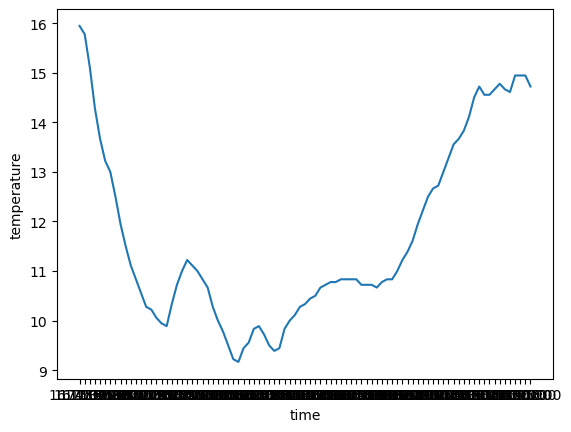

In [32]:
# Lets create a plot using Seaborn
df1= pd.read_csv('C:/Users/Laura/OneDrive/ATU_DA/24-25/programming-for-data-analytics/PFDA-assignments/assignment02/weatherreadings_updated.csv')
sns.lineplot(x='time', y='temperature', data=df1)


In [ ]:
import matplotlib.dates as mdates
from datetime import time
import matplotlib.pyplot as plt

data = []
for i in range(0, 24):
    temp_list = []
    temp_list.append(time(i))
    temp_list.append(i)
    data.append(temp_list)

df2= pd.read_csv('C:/Users/Laura/OneDrive/ATU_DA/24-25/programming-for-data-analytics/PFDA-assignments/assignment02/weatherreadings_updated.csv')
df2.time = pd.to_datetime(df2.time, format='%H:%M:%S')
df2.set_index(['time'],inplace=True)
ax = sns.scatterplot(x=df2.index, y=df2["temperature"])
ax.set(xlabel="time", ylabel="temperature")

ax.xaxis.set_major_locator(mdates.HourLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
ax.tick_params(axis="x", rotation=45)